In [1]:
import pandas as pd
import numpy as np

## Reading Dataset

In [2]:
datasets = pd.read_csv("Restaurant_Reviews.tsv", sep ="\t")

In [3]:
datasets.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
datasets.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [5]:
datasets.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
datasets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
"""
if there is any null value then 
# datasets.dropna()
#datasets.isnull()
are used to remove those null value
"""

'\nif there is any null value then \n# datasets.dropna()\n#datasets.isnull()\nare used to remove those null value\n'

In [8]:
datasets.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


## Data Preprocessing

In [9]:
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Tech
[nltk_data]     Land\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
corpus = [] #Empty list
for i in range(0, 1000):
    review = re.sub(pattern='[^a-zA-Z]', repl=" ", string=datasets['Review'][i])
    
    review = review.lower()
    
    review_words = review.split()#tokenization
    review_words = [word for word in review_words if not word in set(stopwords.words("english"))]
    
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
    
    review = ' '.join(review)
    
    corpus.append(review)

In [11]:
corpus[0:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
count_vec = CountVectorizer(max_features=1500)

In [14]:
X = count_vec.fit_transform(corpus).toarray()
y = datasets.iloc[:, 1].values 
#iloc[:,1] means all rows and last column 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [17]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [18]:
ypredict = nb.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [22]:
print(accuracy_score(y_test, ypredict))

0.765


In [23]:
print(precision_score(y_test, ypredict))

0.7641509433962265


In [24]:
print(recall_score(y_test, ypredict))

0.7864077669902912


In [25]:
#printing 3position
print(round(precision_score(y_test, ypredict), 3))

0.764


In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix = confusion_matrix(y_test, ypredict)

In [28]:
confusion_matrix

array([[72, 25],
       [22, 81]], dtype=int64)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

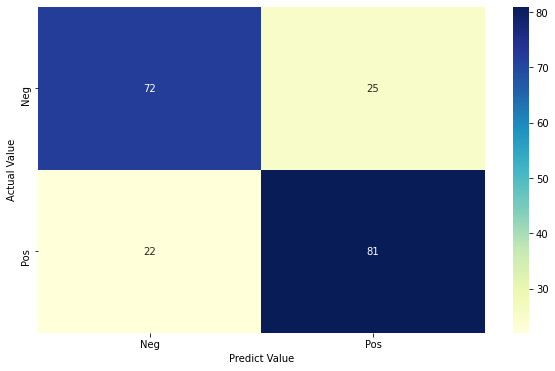

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix, annot = True, cmap ="YlGnBu",
           xticklabels=["Neg", "Pos"],
           yticklabels=["Neg", "Pos"])
plt.xlabel("Predict Value")
plt.ylabel("Actual Value")
plt.show()

In [33]:
accuracy = 0.0
alpha_value  = 0.0

for i in np.arange(0.1, 1.1, 0.1):
    temp_class = MultinomialNB(alpha=i)
    temp_class.fit(X_train, y_train)
    temp_ypredict = temp_class.predict(X_test)
    score = accuracy_score(y_test, temp_ypredict)
    print(round(i,1), round(score*100, 2))
    
    if score > accuracy:
        accuracy = score
        alpha_value = i
        
print()
print(round(accuracy*100, 2), round(alpha_value,1))

0.1 78.0
0.2 78.5
0.3 78.0
0.4 78.0
0.5 77.5
0.6 77.5
0.7 77.5
0.8 77.0
0.9 76.5
1.0 76.5

78.5 0.2


In [34]:
nb_class = MultinomialNB(alpha=0.2)
nb_class.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [35]:
def predict_rev(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl  = " ", string = sample_review)
    
    sample_review = sample_review.lower()
    
    review_words = sample_review.split()
    review_words = [word for word in review_words if not word in set(stopwords.words("english"))]
    
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
    
    review = ' '.join(review)
    
    temp = count_vec.transform([review]).toarray()
    
    return nb_class.predict(temp)

In [40]:
sample_text = "The food is complete awesome"

if predict_rev(sample_text):
    print("Pos review")
else:
    print("Neg review")

Pos review


In [41]:
sample_text = "The food is really bad"

if predict_rev(sample_text):
    print("Pos review")
else:
    print("Neg review")

Neg review
